<a href="https://colab.research.google.com/github/Ritik-baliyan/DATA_SCIENCE_PROJECTS/blob/main/end_to_end_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

housing = pd.read_csv("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-California-Housing-Prices/master/Data/housing.csv")

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:

housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x=housing.drop('median_house_value',axis=1)
y=housing['median_house_value']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [9]:
housing.corr()['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

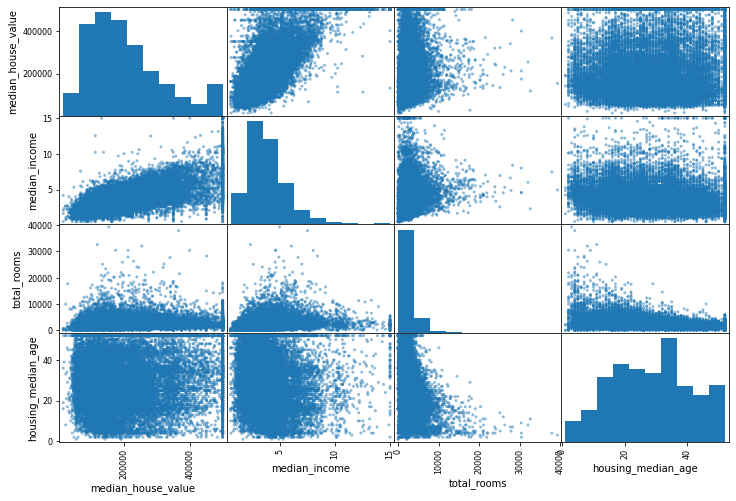

In [10]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

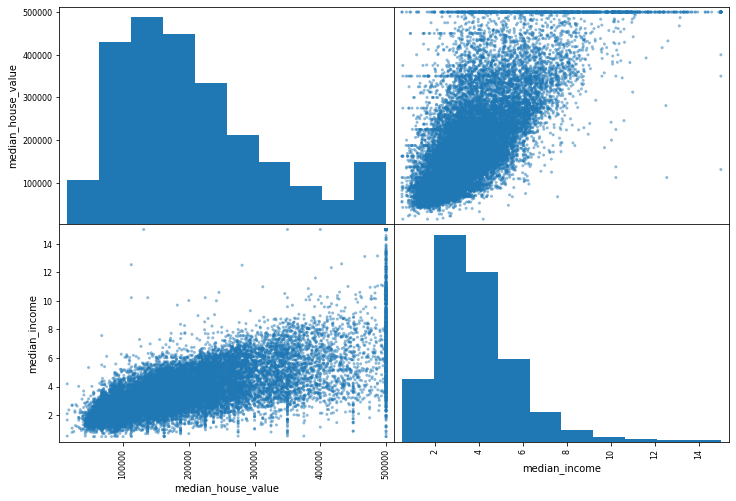

In [11]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
attributes=['median_house_value','median_income']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

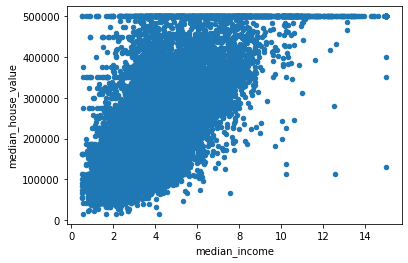

In [12]:
housing.plot.scatter(x='median_income',y='median_house_value')

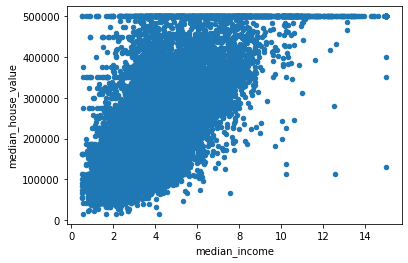

In [13]:
housing.plot(kind='scatter',x='median_income',y='median_house_value')

In [14]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']
housing.isna().sum()


longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

In [15]:
housing.corr()['median_house_value'].sort_values(ascending=True)

bedrooms_per_room          -0.255880
latitude                   -0.144160
longitude                  -0.045967
population                 -0.024650
population_per_household   -0.023737
total_bedrooms              0.049686
households                  0.065843
housing_median_age          0.105623
total_rooms                 0.134153
rooms_per_household         0.151948
median_income               0.688075
median_house_value          1.000000
Name: median_house_value, dtype: float64

In [16]:
housing.isna().sum()


longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

In [17]:
from sklearn.preprocessing import OrdinalEncoder

encode=OrdinalEncoder()

housing_cat_encode=encode.fit_transform(housing[['ocean_proximity']])

In [18]:
housing_cat_encode


array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [19]:
encode.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [20]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [22]:
housing_labels=housing['median_house_value']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(housing_prepared,housing_labels,test_size=0.33,random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression()


In [25]:
model1.fit(X_train,y_train)

LinearRegression()

In [26]:
model1.score(X_test,y_test)

1.0

In [27]:
from sklearn.tree import DecisionTreeRegressor

model2= DecisionTreeRegressor()

In [28]:
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [29]:
model2.score(X_test,y_test)

0.9999981709403533

In [30]:
y_pred=model1.predict(X_test)

In [31]:
y_pred

array([ 47700.,  45800., 500001., ..., 107000., 130700., 307100.])

In [32]:
y_test

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15316    166100.0
14772     93600.0
12870    107000.0
13476    130700.0
16123    307100.0
Name: median_house_value, Length: 6812, dtype: float64

In [33]:
y_pred2=model2.predict(X_test)

In [34]:
y_pred2

array([ 47700.,  45600., 500001., ..., 107000., 130700., 307100.])